In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the data
# Get the 'Mall_Customers.csv' from the same repository
df = pd.read_csv('Mall_Customers.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (203, 5)

First few rows:
   CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  19.0                15.0                      39
1           2    Male  21.0                15.0                      81
2           3  Female  20.0                16.0                       6
3           4  Female  23.0                16.0                      77
4           5  Female  31.0                17.0                      40


In [ ]:
# Encode Gender column
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')
la = LabelEncoder()
df['Gender_Female'] = la.fit_transform(df['Gender_Female'])
df['Gender_Male'] = la.fit_transform(df['Gender_Male'])

In [ ]:
df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)

In [ ]:
db = DBSCAN(eps=0.5, min_samples=5).fit(X)

In [ ]:
# Create core samples mask
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Get cluster labels
labels = db.labels_

# Count clusters (excluding noise points labeled as -1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'\nEstimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')


Estimated number of clusters: 2
Estimated number of noise points: 11


In [ ]:
# Get unique labels
unique_labels = set(labels)
print(f'Unique labels: {unique_labels}')

# Calculate silhouette score (if we have more than 1 cluster)
if n_clusters_ > 1:
    score = metrics.silhouette_score(X, labels)
    print(f'Silhouette Score: {score:.3f}')


Unique labels: {np.int64(0), np.int64(1), np.int64(-1)}
Silhouette Score: 0.351


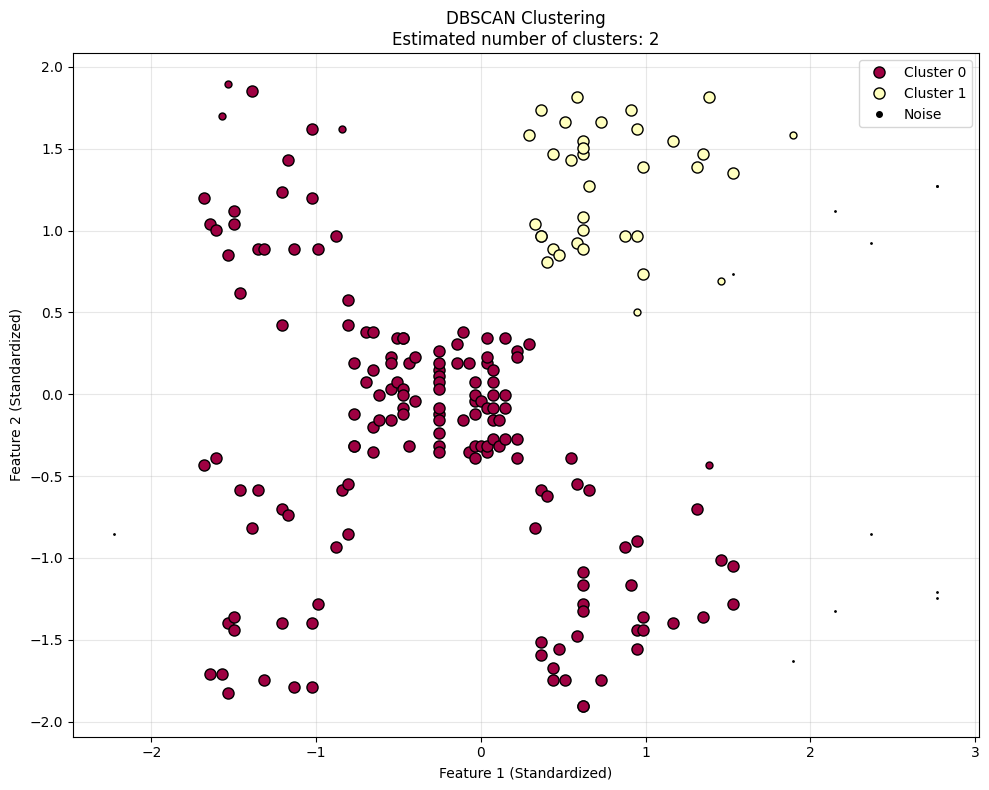

In [ ]:
# Plotting
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(10, 8))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = 'k'
        markersize = 4
    else:
        markersize = 8

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=col,
             markeredgecolor='k',
             markersize=markersize,
             label=f'Cluster {k}' if k != -1 else 'Noise')

    # Plot border points (non-core samples)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=col,
             markeredgecolor='k',
             markersize=markersize-3)

plt.title(f'DBSCAN Clustering\nEstimated number of clusters: {n_clusters_}')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("\nCluster Statistics:")
for k in unique_labels:
    if k != -1:
        cluster_size = list(labels).count(k)
        print(f"Cluster {k}: {cluster_size} points")
    else:
        print(f"Noise points: {n_noise_}")
plt.figure(figsize=(12, 5))


Cluster Statistics:
Cluster 0: 157 points
Cluster 1: 35 points
Noise points: 11


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

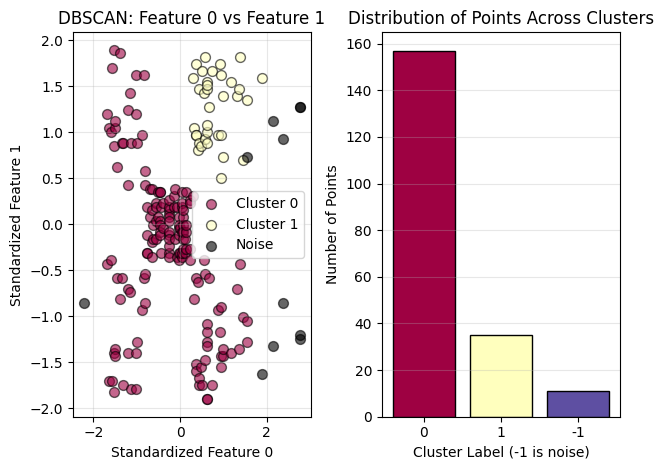

In [ ]:
# Plot 1: Feature 0 vs Feature 1
plt.subplot(1, 2, 1)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col],
                label=f'Cluster {k}' if k != -1 else 'Noise',
                alpha=0.6, edgecolors='k', s=50)

plt.title('DBSCAN: Feature 0 vs Feature 1')
plt.xlabel('Standardized Feature 0')
plt.ylabel('Standardized Feature 1')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Distribution of clusters
plt.subplot(1, 2, 2)
cluster_counts = [list(labels).count(k) for k in unique_labels]
plt.bar(range(len(unique_labels)), cluster_counts, color=colors, edgecolor='k')
plt.xlabel('Cluster Label (-1 is noise)')
plt.ylabel('Number of Points')
plt.title('Distribution of Points Across Clusters')
plt.xticks(range(len(unique_labels)), list(unique_labels))
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()